In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("StudentsPerformance_3_.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


0

<Axes: >

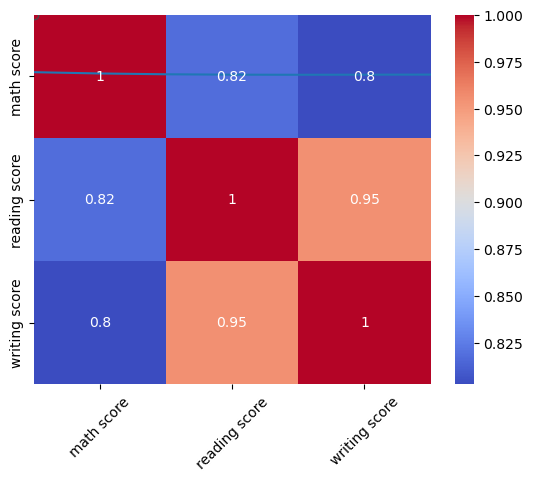

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of scores
sns.histplot(df['math score'], kde=True)
sns.histplot(df['reading score'], kde=True)
sns.histplot(df['writing score'], kde=True)

# Compare by gender
sns.boxplot(x='gender', y='math score', data=df)

# Compare by parental education
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.xticks(rotation=45)

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Show updated DataFrame
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Now safely drop the score columns to define input features
X = df.drop(['math score', 'reading score', 'writing score', 'average score'], axis=1)
y = df['average score']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.1255652122569746
MSE: 187.4495832223678


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{name} R2 Score: {r2_score(y_test, pred):.2f}")


Linear Regression R2 Score: 0.13
Decision Tree R2 Score: -0.09
Random Forest R2 Score: -0.04
